In [44]:
import missingno as mno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

In [2]:
train_data = pd.read_csv("./speed_dating_train.csv")
train_data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,352,12.0,0,23,2,14,18,12,12.0,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,170,13.0,1,26,2,7,16,15,6.0,10,...,6.0,8.0,9.0,5.0,7.0,NaN,NaN,NaN,NaN,NaN
2,221,8.0,1,16,2,9,20,8,7.0,2,...,6.0,8.0,9.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN
3,211,18.0,0,35,2,9,20,7,7.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,238,5.0,0,9,1,10,9,7,7.0,3,...,9.0,9.0,9.0,9.0,8.0,8.0,8.0,8.0,8.0,7.0


In [3]:
train_data.shape

(8277, 195)

<AxesSubplot:>

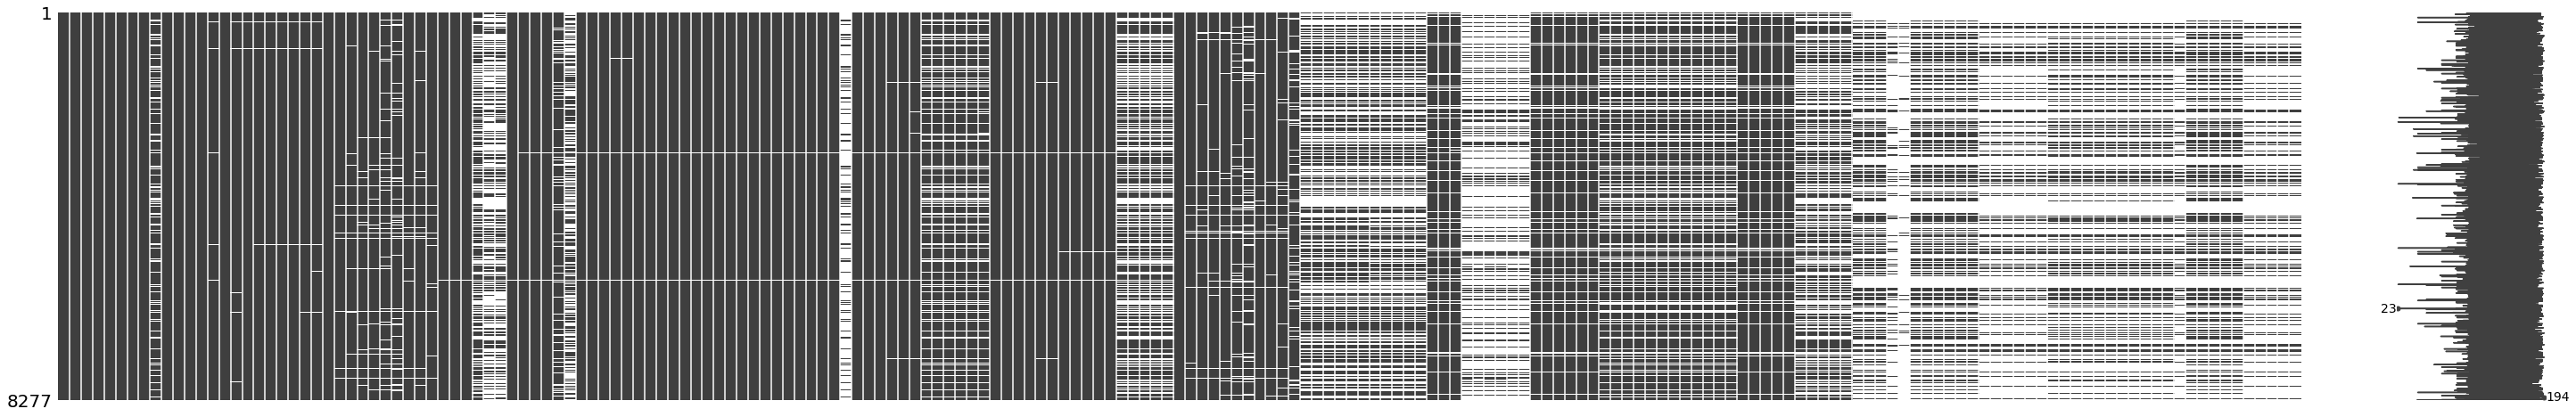

In [4]:
mno.matrix(train_data,figsize=(50,8))
#属性数量超过50属性标签不会显示

In [5]:
percent_missing = train_data.isnull().sum() *100/len(train_data)
missing_df = pd.DataFrame({
    'column_name':train_data.columns,
    'percent_missing':percent_missing
})
missing_df.sort_values(by='percent_missing')

,column_name,percent_missing
iid,iid,0.000000
dec_o,dec_o,0.000000
samerace,samerace,0.000000
match,match,0.000000
partner,partner,0.000000
...,...,...
amb7_2,amb7_2,76.658209
sinc7_2,sinc7_2,76.658209
expnum,expnum,78.482542
numdat_3,numdat_3,82.167452


0    6922
1    1355
Name: match, dtype: int64


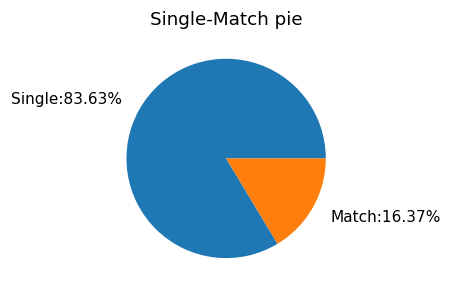

In [6]:
plt.subplots(figsize=(3,3),dpi=110)
group = train_data.match.value_counts()
print(group)

match_percentage = round(group[1]/sum(group)*100,2)
single_percentage = round(group[0]/sum(group)*100,2)

names = [
    'Single:' +str(single_percentage)+'%',
    'Match:' + str(match_percentage)+'%'
]
plt.title('Single-Match pie')
plt.pie(
    group,
    labels=names,
    labeldistance=1.2
       )
plt.show()

Female/Male:1.0


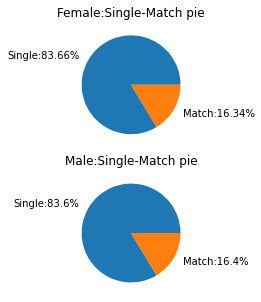

In [7]:
#分性别配对成功比例，但是配对是男女1：1所以这里只能反映基数的差别
sex_rate =round(len(train_data[train_data.gender==0])/len(train_data[train_data.gender==1]),2)
print('Female/Male:'+str(sex_rate))

plt.figure(figsize=(5,5))

plt.subplot(2,1,1)
female_group = train_data[train_data.gender == 0].match.value_counts()

match_percentage = round(female_group[1]/sum(female_group)*100,2)
single_percentage = round(female_group[0]/sum(female_group)*100,2)
names = [
    'Single:' +str(single_percentage)+'%',
    'Match:' + str(match_percentage)+'%'
]
plt.title('Female:Single-Match pie')
plt.pie(
    group,
    labels=names,
    labeldistance=1.2
       )

plt.subplot(2,1,2)
male_group = train_data[train_data.gender ==1].match.value_counts()

match_percentage = round(male_group[1]/sum(male_group)*100,2)
single_percentage = round(male_group[0]/sum(male_group)*100,2)
names = [
    'Single:' +str(single_percentage)+'%',
    'Match:' + str(match_percentage)+'%'
]
plt.title('Male:Single-Match pie')
plt.pie(
    group,
    labels=names,
    labeldistance=1.2
       )

plt.show()

0.011356771777213967
30岁以上match率:0.13241678726483358
30岁以上占总体的比例:0.16696870846925216


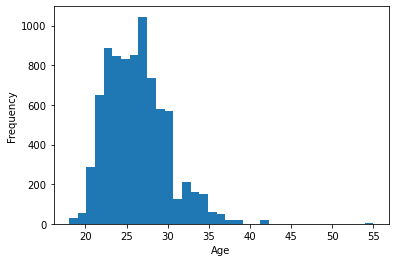

In [8]:
print(train_data.age.isnull().sum()/len(train_data))

age = train_data[np.isfinite(train_data['age'])]['age']
plt.hist(age,bins=35)
plt.xlabel('Age')
plt.ylabel('Frequency')

#相亲群体年龄主要在22-30区间

age_over_30 = train_data[train_data['age']>=30]
group_age_over_30 = age_over_30.match.value_counts()
print('30岁以上match率:'+str(group_age_over_30[1]/sum(group_age_over_30)))
print('30岁以上占总体的比例:'+str(len(train_data[train_data['age']>=30])/len(train_data)))

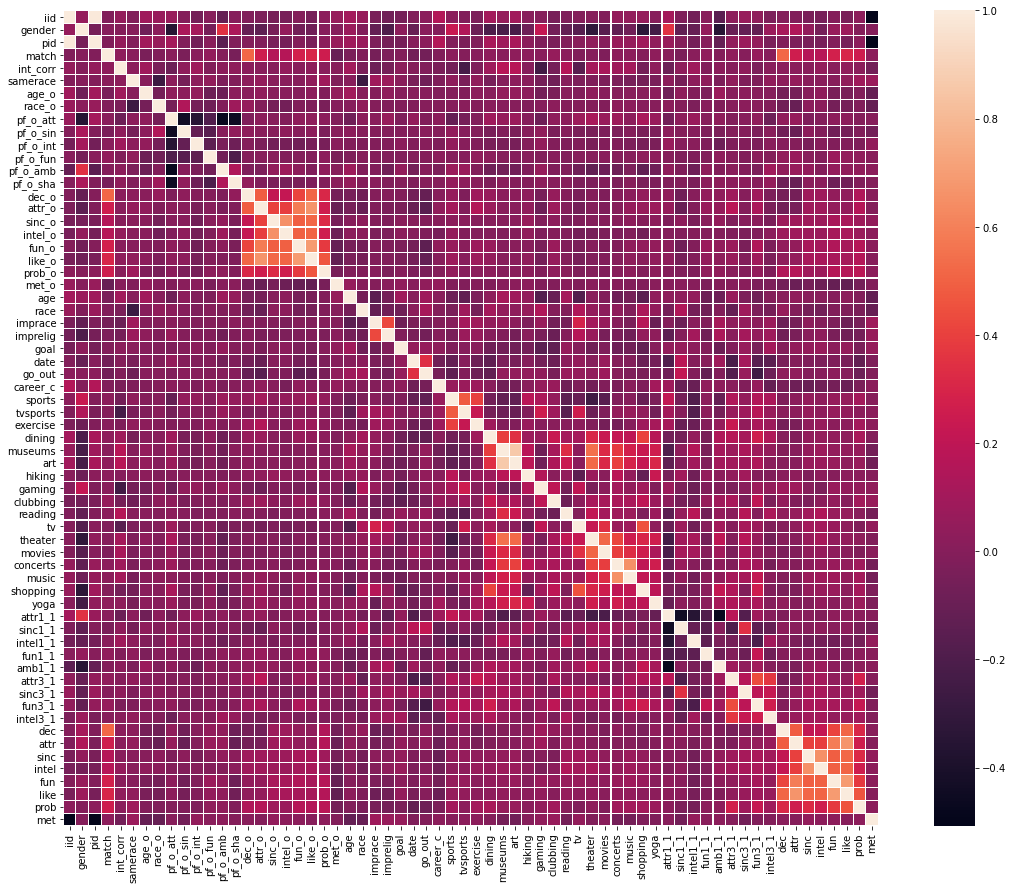

In [9]:
import seaborn as sns

data_select = train_data[[
    'iid', 'gender', 'pid', 'match', 'int_corr', 'samerace', 'age_o',
       'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb',
       'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'like_o',
       'prob_o', 'met_o', 'age', 'race', 'imprace', 'imprelig', 'goal', 'date',
       'go_out', 'career_c', 'sports', 'tvsports', 'exercise', 'dining',
       'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',
       'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'attr1_1',
       'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'attr3_1', 'sinc3_1',
       'fun3_1', 'intel3_1', 'dec', 'attr', 'sinc', 'intel', 'fun', 'like',
       'prob', 'met'
]]

#heatmap
plt.subplots(figsize=(20,15))
ax = plt.axes()

_ = sns.heatmap(
    data_select.corr(),
    square=True,
    linewidths=0.1,vmax=1.0, linecolor='white',
    annot_kws={'fontsize':12 }
)
#attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o

In [93]:
dropList=['field','undergra','career','from']
typechangeList = ['tuition','mn_sat','zipcode','income']

In [94]:
def data_process(data):
    data = data.drop(dropList,axis=1)
    data = data.drop(typechangeList,axis=1)
    return data

In [95]:
x_train = train_data.drop('match',axis=1)
y_train = train_data['match']

x_train = data_process(x_train)


x_train.shape

(8277, 186)

In [96]:
test = pd.read_csv('./speed_dating_test.csv')
uid  = test['uid']
test = test.drop('uid',axis=1)
test = data_process(test)

test.shape

(101, 186)

In [98]:
from xgboost import XGBClassifier  
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

x_train = x_train.fillna(-1)
test = test.fillna(-1)

clf = DecisionTreeRegressor()
clf.fit(x_train,y_train)
clf.score(x_train,y_train)
y_predict = clf.predict(test)

dataframe_predicrt = pd.DataFrame(y_predict,columns=['match'])
results = pd.concat([uid,dataframe_predicrt],axis = 1)
print(results.shape)
results.to_csv('submission.csv',index=None)


(101, 2)
